Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:

Загрузите датасет taxi.csv.

Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

Разделите выборку на обучаемую и тестовую.

Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [1]:
%matplotlib inline

import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Загрузите датасет taxi.csv.

In [245]:
df = pd.read_csv('taxi.csv')

# Посмотрите на данные. 

In [246]:
df.head(10)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


# Отобразите общую информацию по признакам (вспомните о describe и info).

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [248]:
df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


# Напишите в markdown свои наблюдения.

* offer_gk - ИД строки (ключ)
* weekday_key - номер дня недели по английскому стилю (вск - 0, пн - 1, и т.д.)
* hour_key - час (от 0 до 23)
* driver_gk - ИД водителя
* order_gk - ИД заявки
* driver_latitude - координаты водителя (широта)
* driver_longitude - координаты водителя (долгота)
* origin_order_latitude - координаты пассажира (широта)
* origin_order_longitude - координаты пассажира (долгота)
* distance_km - расчетное расстояние поездки
* duration_min - расчетное время поездки
* offer_class_group - класс заказа
* ride_type_desc - тип заказа
* driver_response - решение водителя

Из указанного датасета можно смело удалить столбцы offer_gk, driver_gk, order_gk, т.к. это уникальные ИД и на результат они имеют достаточно маленькое влияние. Возможно, из них можно тольков ычленить поведенческие особенности конкретного водителя или заказчика, но мы не этим занимаемся.

Также нужно уделить пристальное внимание столбцу distance_km, т.к. его максимальное значение, вероятно, является выбросом и вполне возможны иные аномалии. 5234 км - чуть меньше радиуса планеты Земля и 1\8 протяженности экватора.

Также понадобится обработка расстояния, ширины, долготы и длительности поездки со значением -1. Это, по всей видимости, либо некорректные данные (в случае с геолокацией водителя или пассажира), либо их следствие - дистанция и длительность.

# Начнем с удаления записей ИД.

In [249]:
df.drop(['offer_gk', 'driver_gk', 'order_gk'], axis=1, inplace=True)

# Обработаем данные ширины-долготы, равные -1 или 0

In [250]:
df[df['driver_latitude'] <= 0].shape, df[df['driver_longitude'] <= 0].shape

((141, 11), (141, 11))

141 значение из 100к будем считать незначительным, возможно, имели место сбои системы геолокации. Невозможно подобрать заказ водителю, который находится неизвестно где.

In [251]:
df[df['origin_order_latitude'] <= 0].shape, df[df['origin_order_longitude'] <= 0].shape

((13, 11), (13, 11))

Также присутствуют 13 заказов, где неизвестна геолокация пассажира. Это нонсенс, ведь водитель не может ехать туда, не знаю куда. От них стоит избавиться.

In [252]:
kill_drivers_lat = df[df['driver_latitude'] <= 0].index
kill_drivers_long = df[df['driver_longitude'] <= 0].index
kill_order_lat = df[df['origin_order_latitude'] <= 0].index
kill_order_long = df[df['origin_order_longitude'] <= 0].index 

In [253]:
df.drop([*kill_drivers_lat, *kill_drivers_long, *kill_order_lat, *kill_order_long], inplace=True)

In [254]:
df.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000
mean,3.160087,13.826633,55.780883,37.546631,55.780195,37.546311,18.411756,23.159030,0.491757
std,2.054477,7.308449,0.153851,0.157053,0.156106,0.159887,41.150869,33.901266,0.499935
min,0.000000,0.000000,55.327636,36.984771,55.327917,36.994072,-1.000000,-1.000000,0.000000
25%,1.000000,8.000000,55.709285,37.413497,55.708502,37.407117,-1.000000,-1.000000,0.000000
50%,3.000000,16.000000,55.773085,37.533874,55.772734,37.532189,10.441500,19.750000,0.000000
75%,5.000000,20.000000,55.960697,37.624235,55.962035,37.624145,30.694750,37.883000,1.000000
max,6.000000,23.000000,56.174097,38.280547,56.172361,38.243608,5234.283000,3958.283000,1.000000


# Теперь у нас остались значени distance_km и duration_min со странными значениями -1. Проверим их.

In [255]:
df[df['distance_km'] == -1].shape, df[df['duration_min'] == -1].shape

((26083, 11), (26083, 11))

Таких строк больше 1\4 от датасета. Удалять их в таком объеме нежелательно.

In [256]:
df[df['distance_km'] == 0].shape, df[df['duration_min'] == 0].shape

((152, 11), (152, 11))

Заказов с 0 километражом или длительностью немного. 

Сразу оговорюсь, что по значениям 0 и -1 для дистанции и дилтельности ситуация очень похожа на то, что люди отменяли заказы до приезда водителя или после него, как раньше это было с машинами Яндекс-Такси по просьбе самих водителей и из нежелания платить комиссию.

По идее это действие происходит после приезда водителя и врядли влияет на его решение принять или не принять заказ, поэтому не будем пока трогать эти данные.

# Обработаем выбросы по дистанции поездки.

Как я уже писала ранее, в столбце дистанции ( и длительности, соответственно) есть максимальное значение, которое больше размеров какого-нибудь государства и сопоставимо  с радиусом Земли. При определенных условиях попробуем такие значения удалить из выборки. 

In [257]:
df[df['distance_km'] > 500].shape

(38, 11)

Цена 1км такси в Москве (а судя по координатам, это она) около 23 рублей, поэтому нас врядли интересуют поездки длиннее 500 км. Остальное, вероятно, выбросы.

In [258]:

df.drop(df[df['distance_km'] > 500].index, inplace=True)

In [259]:
df.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,99808.000000,99808.000000,99808.000000,99808.000000,99808.000000,99808.000000,99808.000000,99808.000000,99808.000000
mean,3.159977,13.825956,55.780898,37.546623,55.780209,37.546302,17.885343,22.768508,0.491654
std,2.054540,7.308594,0.153863,0.157056,0.156118,0.159889,21.133205,21.269468,0.499933
min,0.000000,0.000000,55.327636,36.984771,55.327917,36.994072,-1.000000,-1.000000,0.000000
25%,1.000000,8.000000,55.709280,37.413497,55.708502,37.407117,-1.000000,-1.000000,0.000000
50%,3.000000,16.000000,55.773110,37.533857,55.772744,37.532150,10.430500,19.733000,0.000000
75%,5.000000,20.000000,55.960718,37.624225,55.962038,37.624139,30.655250,37.867000,1.000000
max,6.000000,23.000000,56.174097,38.280547,56.172361,38.243608,448.072000,374.000000,1.000000


Теперь данные выглядят более или менее прилично с точки зрения выбросов. Перейдем к категориальным признакам.

# Категориальные признаки

In [260]:
df['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

In [261]:
df['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

In [262]:
df[df['offer_class_group'] == 'Test'].shape

(8, 11)

Очевидно, это какие-то тестовые данные. Если бы это были поездки по какой-то программе "Первая поездка", их было бы в сотни раз больше. Избавимся от этого.

In [263]:
df.drop(df[df['offer_class_group'] == 'Test'].index, inplace=True)

Теперь разделим эти признаки при помощи подхода OneHotEncoding на пачку бинарных столбцов. Их не слишком много.

In [264]:
df = pd.get_dummies(df)

In [265]:
df.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,offer_class_group_Delivery,...,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,1,0,...,0,0,1,0,0,0,0,0,0,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,0,...,0,0,0,0,0,0,0,0,0,1


# Обработаем расстояния

Т.к. мы избавилимь от некорректных значений в ширине и долготе обоих участников наших поездок, то можем сделать в упрощенном виде оценку расстояния от А до Б. Это позволит нам удалить сразу 4 столбца и свести их в 1.

In [266]:
def distance_len(row):
    """
    Посчитаем расстояние между водителем и потенциальным пассажиром в упрощенном виде 
    (не по расстоянию гугл-карт или Яндекс-карт,  а векторное). Простите, очень лень заморачиваться с АПИ =(
    """
    return np.linalg.norm([
        row['driver_latitude'] - row['origin_order_latitude'],
        row['driver_longitude'] - row['origin_order_longitude'],
    ])

In [267]:
df['distance_between_driver_origin'] = df.apply(distance_len, axis=1)

In [268]:
df['distance_between_driver_origin'].head(10)

0    0.020890
1    0.050597
2    0.006442
3    0.009697
4    0.010694
5    0.008095
6    0.005991
7    0.055239
8    0.046738
9    0.060544
Name: distance_between_driver_origin, dtype: float64

Видимо, что-то получилось. Удалим ширину-долготу.

In [269]:
df.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1, inplace=True)

# Кореляции

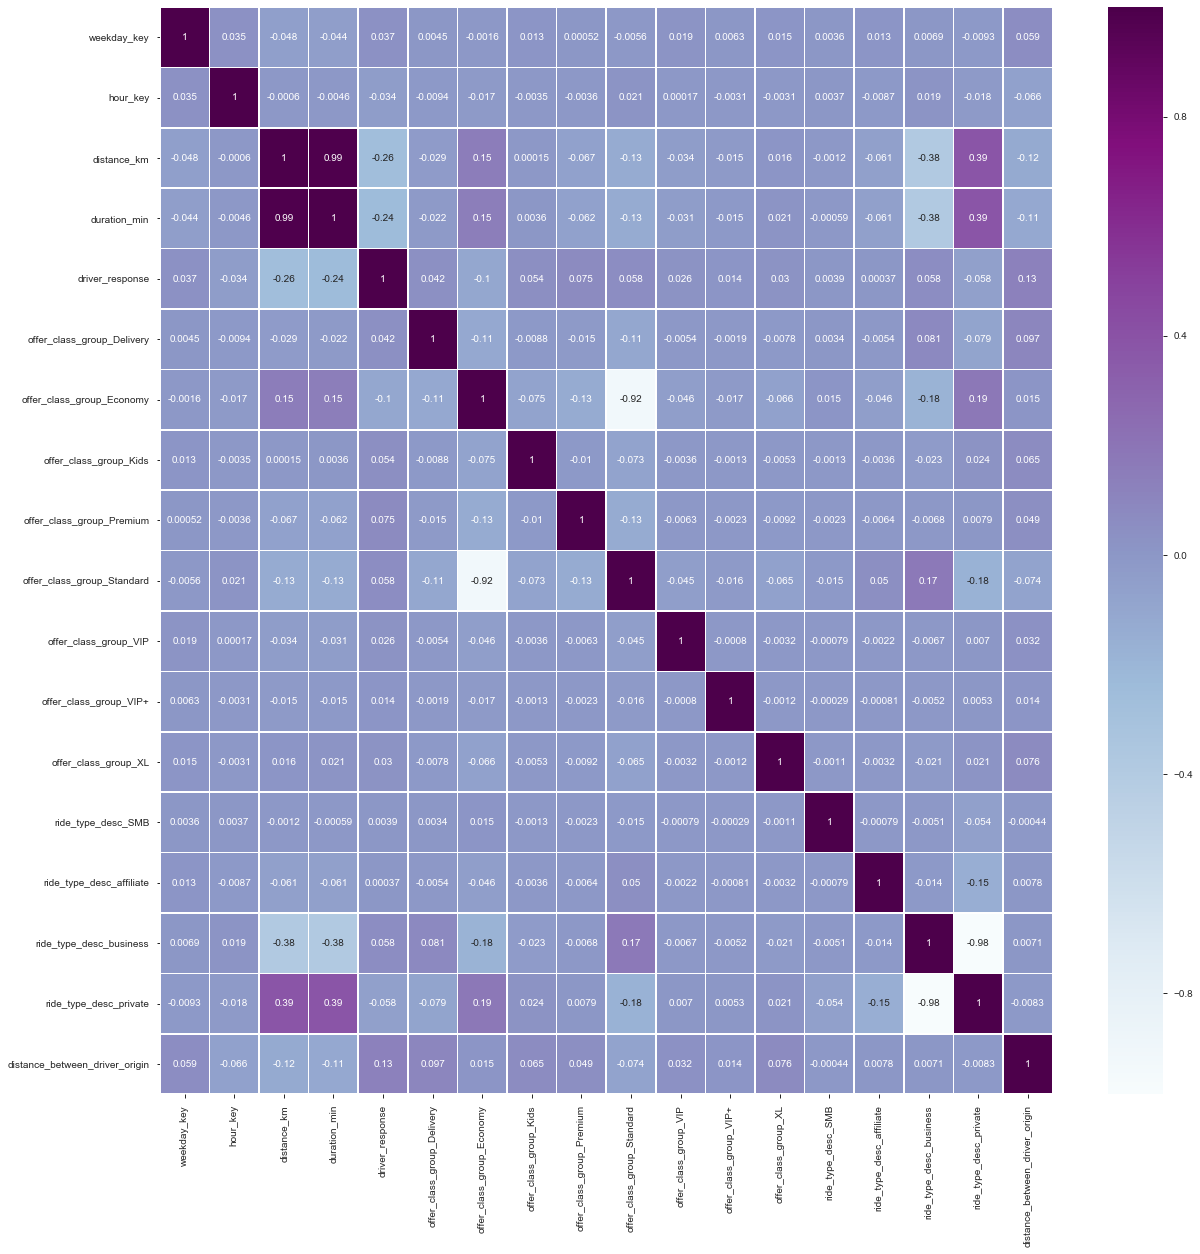

In [270]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=0.5, cmap='BuPu')
plt.show()

Видим, что у нас больашя кореляция между Расстоянием и Дительностью (порядка 99%), а также между некоторыми типами поездки и классами.

Т.о. видим, что формально можно удалить из модели такие параметры, как duration_min, offer_class_group_Economy, ride_type_desc_business.
UPD. Если удалить, то модель дает на 1% меньше точность. Не удаляем=)

In [271]:
rfc = RandomForestClassifier(n_estimators=200)

In [272]:
X = df.drop(['driver_response'], axis=1)
Y = df['driver_response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [273]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((69860, 17), (29940, 17), (69860,), (29940,))

In [274]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [275]:
rfc.score(X_test, Y_test)

0.7036740146960588

Как вариант - можно столбец weekday_key и hour_key разделить на будние и выходные и день-ночь.
Попробуем.

In [276]:
ferials = [1,2,3,4,5]
df['ferial'] = np.where(np.isin(df.weekday_key, ferials), 1, 0)

In [277]:
df.head(20)

,weekday_key,hour_key,distance_km,duration_min,driver_response,offer_class_group_Delivery,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private,distance_between_driver_origin,ferial
0,5,20,-1.000,-1.000,0,0,1,0,0,0,0,0,0,0,0,0,1,0.020890,1
1,5,14,18.802,25.217,1,0,0,0,0,1,0,0,0,0,0,0,1,0.050597,1
2,6,14,6.747,9.800,0,0,1,0,0,0,0,0,0,0,0,0,1,0.006442,0
3,2,6,-1.000,-1.000,1,0,1,0,0,0,0,0,0,0,0,0,1,0.009697,1
4,4,16,12.383,19.250,1,0,1,0,0,0,0,0,0,0,0,0,1,0.010694,1
5,6,15,6.747,9.800,0,0,1,0,0,0,0,0,0,0,0,0,1,0.008095,0
6,2,11,-1.000,-1.000,1,0,0,0,0,1,0,0,0,0,0,1,0,0.005991,1
7,5,20,1.517,3.933,0,0,1,0,0,0,0,0,0,0,0,0,1,0.055239,1
8,5,20,6.222,15.433,0,0,1,0,0,0,0,0,0,0,0,0,1,0.046738,1
9,6,7,10.410,23.083,0,0,1,0,0,0,0,0,0,0,0,0,1,0.060544,0


In [278]:
def night_class(row):
    if row['hour_key'] >= 22 or row['hour_key'] <=7:
        return 1
    else:
        return 0

In [279]:
df['hight_class'] = df.apply(night_class, axis=1)

In [280]:
df.drop(['hour_key', 'weekday_key'], axis=1, inplace=True)

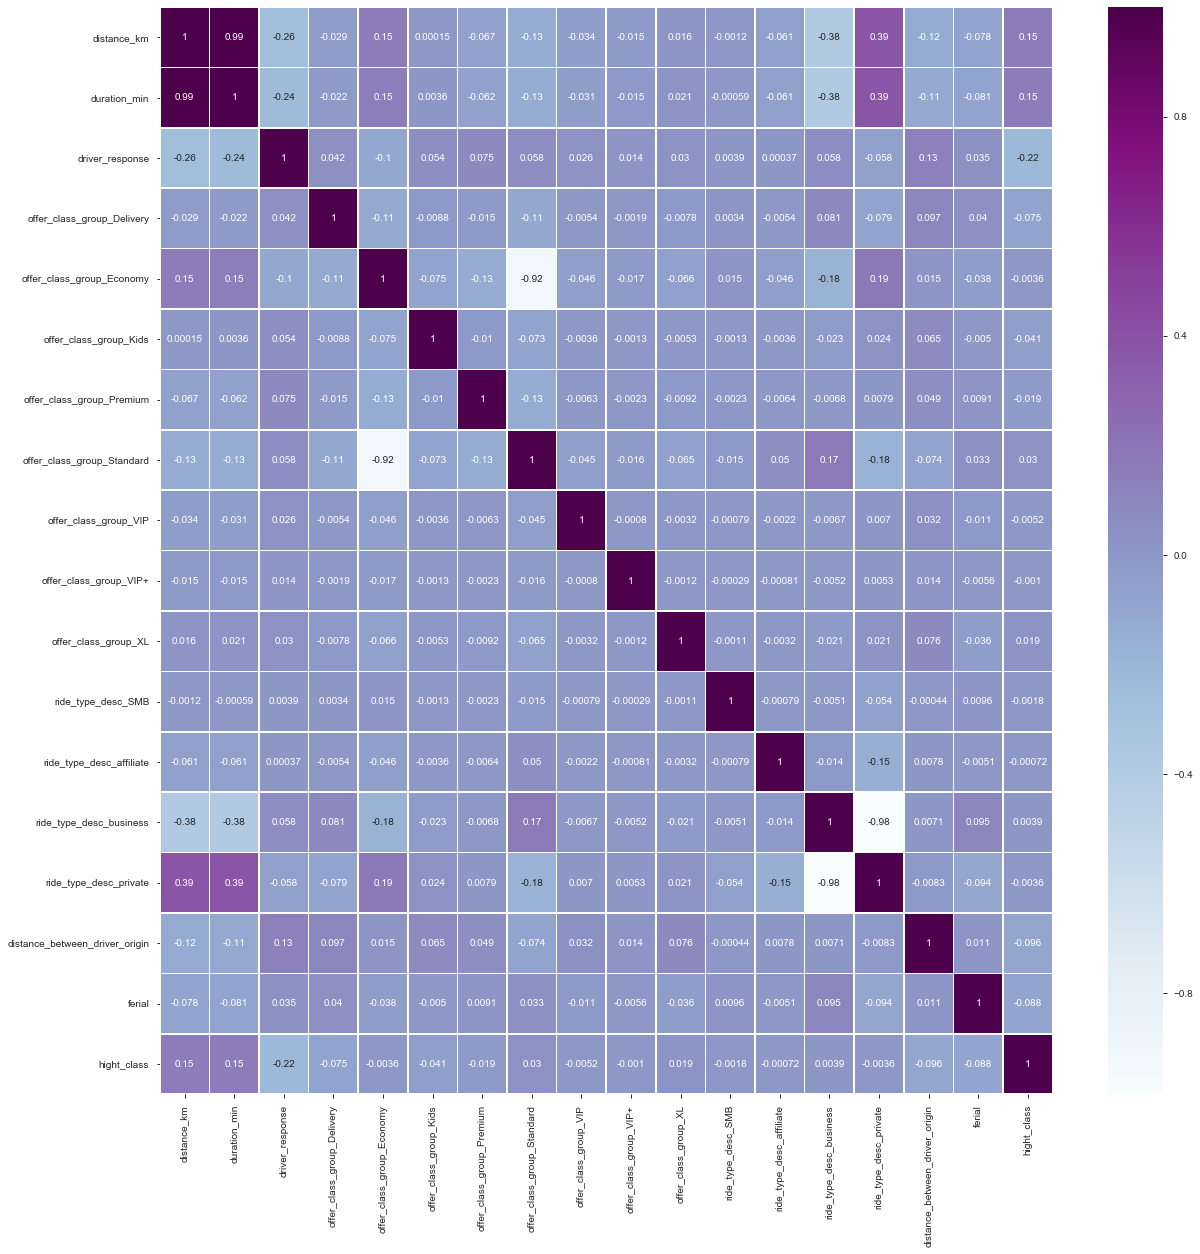

In [281]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=0.5, cmap='BuPu')
plt.show()

In [282]:
rfc2 = RandomForestClassifier(n_estimators=200)

In [283]:
X = df.drop(['driver_response'], axis=1)
Y = df['driver_response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [284]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((69860, 17), (29940, 17), (69860,), (29940,))

In [285]:
rfc2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [286]:
rfc2.score(X_test, Y_test)

0.692251169004676

Улуышений нет, попробуем убрать категориальные признаки.

In [289]:
X = df[['distance_km', 'hight_class', 'ferial', 'distance_between_driver_origin']]
Y = df['driver_response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [290]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((69860, 4), (29940, 4), (69860,), (29940,))

In [291]:
rfc2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [292]:
rfc2.score(X_test, Y_test)

0.6670674682698731

К сожалению эти преобразования были лишними... ))

Максимальное, что получилось исходя из моей модели - 70,36%